<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Customer_churn_prediction_Telecom_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer churn prediction: Telecom Churn Dataset**
Customer churn, also known as customer retention, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings

#**1. Data overview**

In [11]:
import io
from google.colab import files
uploaded = files.upload()

Saving churn-bigml-20 (1).csv to churn-bigml-20 (1).csv


In [16]:
filename = next(iter(uploaded))

In [4]:
telcom = pd.read_csv(filename)

In [17]:
telcom_test = pd.read_csv(filename)

In [5]:
telcom.shape

(2666, 20)

In [22]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [18]:
telcom_test.shape

(667, 20)

In [6]:
telcom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [8]:
dataoveriew(telcom, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 2666

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         15

In [19]:
dataoveriew(telcom_test, 'Overiew of the test dataset')

Overiew of the test dataset:

Rows: 667

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls   

#**2. Exploratory Data Analysis**

##**2.1. Customer churn in data**

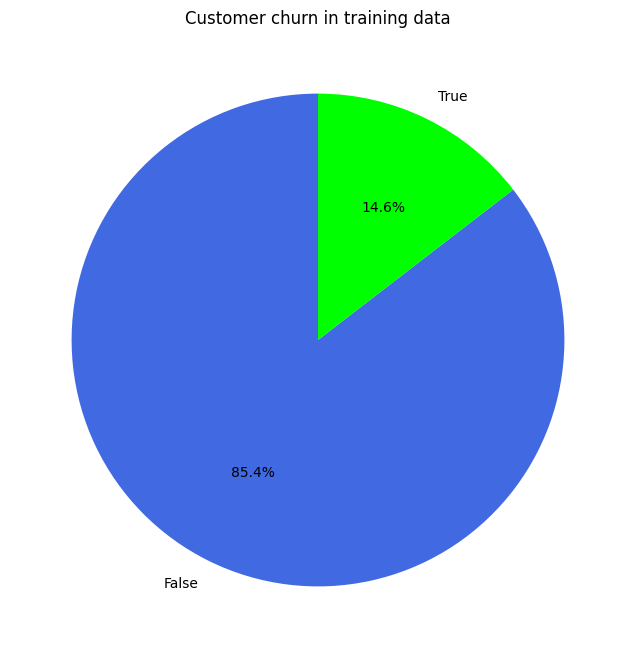

In [9]:
# Get churn counts
churn_counts = telcom["Churn"].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, colors=['royalblue', 'lime'], autopct='%1.1f%%', startangle=90)
plt.title('Customer churn in training data')
plt.show()

#**2.2. Variable distributions**

<ipython-input-20-976ca4798e71>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



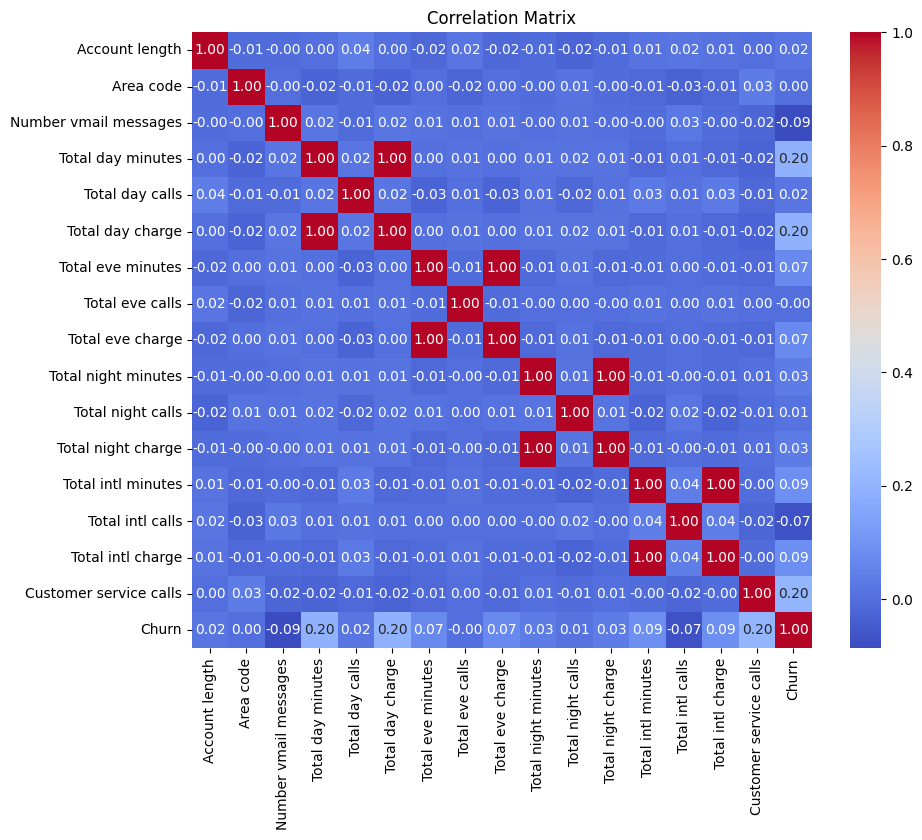

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = telcom.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:
# #Separating columns to be visualized
# out_cols = list(set(telcom.nunique()[telcom.nunique()<6].keys().tolist()
#                     + telcom.select_dtypes(include='object').columns.tolist()))
# viz_cols = [x for x in telcom.columns if x not in out_cols] + ['Churn']

# sns.pairplot(telcom[viz_cols], diag_kind="kde")
# plt.show()

**Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.**

#**3. Data preprocessing**

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Removing correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge',
               'Total night charge', 'Total intl charge']

telcom = telcom.drop(columns = col_to_drop, axis = 1)
telcom_test = telcom_test.drop(columns = col_to_drop, axis = 1)

In [24]:
telcom.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False


In [25]:
telcom_test.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,No,No,0,184.5,97,351.6,80,215.8,90,8.7,4,1,False
1,65,No,No,0,129.1,137,228.5,83,208.8,111,12.7,6,4,True
2,161,No,No,0,332.9,67,317.8,97,160.6,128,5.4,9,4,True


In [26]:
#target column
target_col = ["Churn"]

#number of levels in feature to be a categorical feature
nlevels = 6

#Separating categorical and numerical columns
#categorical columns
cat_cols = list(set(telcom.nunique()[telcom.nunique()<nlevels].keys().tolist()
                    + telcom.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols = [x for x in telcom.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [32]:
#categorical columns
cat_cols

['International plan', 'Voice mail plan']

In [33]:
#numerical columns
num_cols

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total eve minutes',
 'Total eve calls',
 'Total night minutes',
 'Total night calls',
 'Total intl minutes',
 'Total intl calls',
 'Customer service calls']

In [34]:
# binary columns
bin_cols

['International plan', 'Voice mail plan', 'Churn']

In [37]:
#columns more than two values
multi_cols

[]

In [45]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    telcom[i] = le.fit_transform(telcom[i])
    telcom_test[i] = le.transform(telcom_test[i])

#combining the train and test datasets
trainsize = telcom.shape[0]
comb = pd.concat((telcom, telcom_test), sort=False)

#Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

In [47]:
comb.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0


In [48]:
trainsize

2666

In [49]:
#Separating the train and test datasets
telcom = comb[:trainsize]
telcom_test = comb[trainsize:]

In [51]:
telcom.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0


In [53]:
telcom_test.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,117,0,0,0,184.5,97,351.6,80,215.8,90,8.7,4,1,0
1,65,0,0,0,129.1,137,228.5,83,208.8,111,12.7,6,4,1
2,161,0,0,0,332.9,67,317.8,97,160.6,128,5.4,9,4,1


In [54]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(telcom_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

In [55]:
scaled.head(3)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,0.692163,1.247508,1.579670,0.484868,-0.058619,-0.050781,0.857403,-0.469031,-0.085020,-0.597527,-0.429172
1,0.161278,1.320985,-0.329918,1.135375,-0.095916,0.147654,1.048458,0.149054,1.242179,-0.597527,-0.429172
2,0.919686,-0.589414,1.179302,0.685024,-1.554439,0.494917,-0.759668,0.200561,0.704125,0.216894,-1.191955


In [57]:
scaled_test.head(3)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,0.414080,-0.589414,0.092590,-0.165639,2.968355,-0.993351,0.288179,-0.520538,-0.551334,-0.190317,-0.429172
1,-0.900493,-0.589414,-0.929547,1.835921,0.551880,-0.844524,0.150304,0.561110,0.883476,0.624104,1.859175
2,1.526412,-0.589414,2.830588,-1.666809,2.304855,-0.149999,-0.799061,1.436730,-1.735052,1.845734,1.859175


In [58]:
#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols, axis = 1)
telcom = telcom.merge(scaled, left_index=True, right_index=True, how = "left")

df_telcom_test_og = telcom_test.copy()
telcom_test = telcom_test.drop(columns = num_cols, axis = 1)
telcom_test = telcom_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

In [59]:
telcom.head(3)

,International plan,Voice mail plan,Churn,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,0,1,0,0.692163,1.247508,1.579670,0.484868,-0.058619,-0.050781,0.857403,-0.469031,-0.085020,-0.597527,-0.429172
1,0,1,0,0.161278,1.320985,-0.329918,1.135375,-0.095916,0.147654,1.048458,0.149054,1.242179,-0.597527,-0.429172
2,0,0,0,0.919686,-0.589414,1.179302,0.685024,-1.554439,0.494917,-0.759668,0.200561,0.704125,0.216894,-1.191955


In [60]:
telcom_test.head(3)

,International plan,Voice mail plan,Churn,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,0,0,0,0.414080,-0.589414,0.092590,-0.165639,2.968355,-0.993351,0.288179,-0.520538,-0.551334,-0.190317,-0.429172
1,0,0,1,-0.900493,-0.589414,-0.929547,1.835921,0.551880,-0.844524,0.150304,0.561110,0.883476,0.624104,1.859175
2,0,0,1,1.526412,-0.589414,2.830588,-1.666809,2.304855,-0.149999,-0.799061,1.436730,-1.735052,1.845734,1.859175


#**3.1. Variable summary**

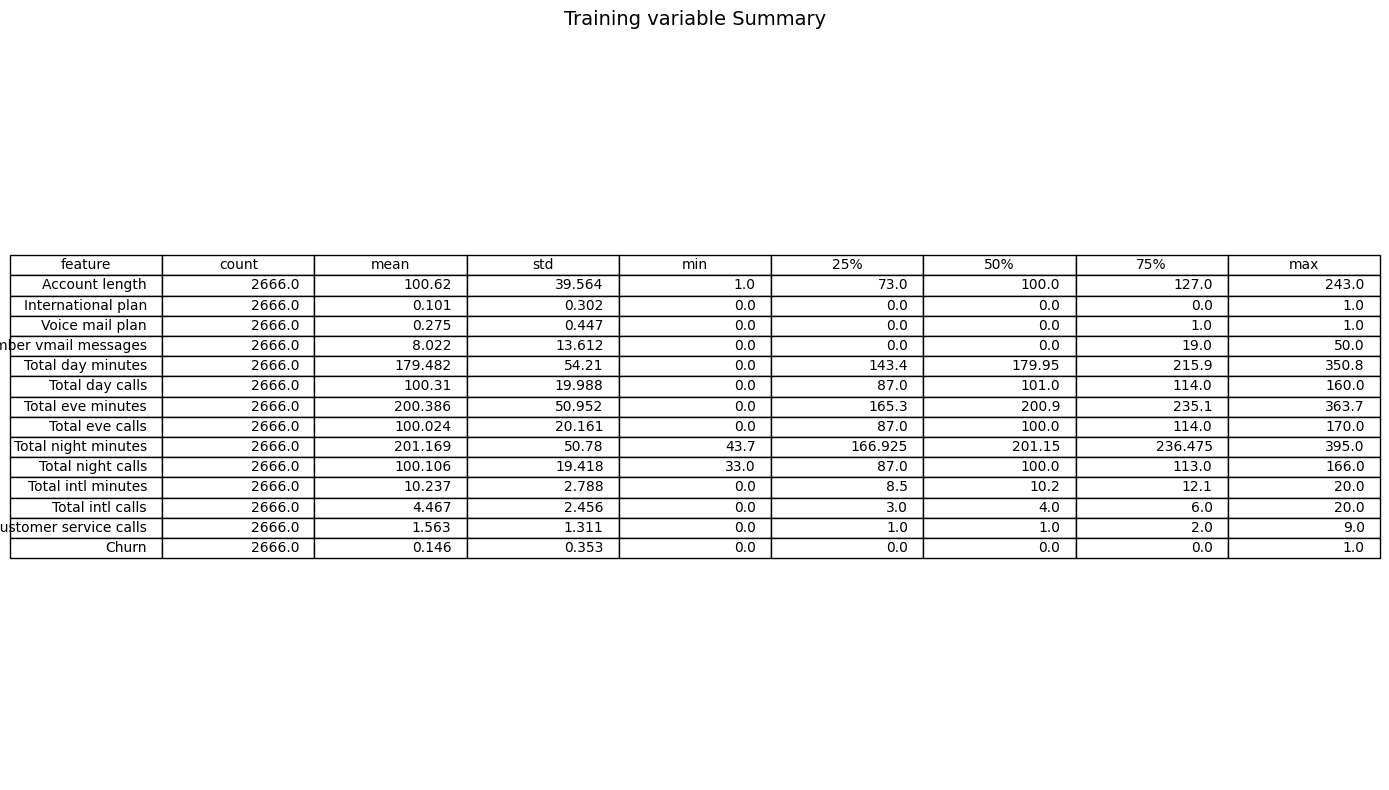

In [64]:


# Assuming df_telcom_og and summary are already defined

# Round summary to 3 decimal places
summary = np.around(summary, 3)

# Prepare data for table
table_data = []
for _, row in summary.iterrows():
    table_data.append([row['feature'], row['count'], row['mean'], row['std'],
                       row['min'], row['25%'], row['50%'], row['75%'], row['max']])

# Create the table
plt.figure(figsize=(14, 8))
column_headers = summary.columns.tolist()
table = plt.table(cellText=table_data,
                  colLabels=column_headers,
                  loc='center')

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Hide axes
plt.axis('off')

# Title
plt.title("Training variable Summary", fontsize=14)

plt.tight_layout()
plt.show()


In [68]:
# summary = (df_telcom_og[[i for i in df_telcom_og.columns]].
#            describe().transpose().reset_index())

# summary = summary.rename(columns = {"index" : "feature"})
# summary = np.around(summary,3)

# val_lst = [summary['feature'], summary['count'],
#            summary['mean'],summary['std'],
#            summary['min'], summary['25%'],
#            summary['50%'], summary['75%'], summary['max']]

# trace  = go.Table(header = dict(values = summary.columns.tolist(),
#                                 line = dict(color = ['#506784']),
#                                 fill = dict(color = ['#119DFF']),
#                                ),
#                   cells  = dict(values = val_lst,
#                                 line = dict(color = ['#506784']),
#                                 fill = dict(color = ["lightgrey",'#F5F8FF'])
#                                ),
#                   columnwidth = [200,60,100,100,60,60,80,80,80])
# layout = go.Layout(dict(title = "Training variable Summary"))
# figure = go.Figure(data=[trace],layout=layout)
# py.iplot(figure)

#**3.2. Correlation matrix**

In [ ]:
# #correlation
# correlation = telcom.corr()
# #tick labels
# matrix_cols = correlation.columns.tolist()
# #convert to array
# corr_array = np.array(correlation)

# #Plotting
# trace = go.Heatmap(z = corr_array,
#                    x = matrix_cols,
#                    y = matrix_cols,
#                    colorscale = "Viridis",
#                    colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
#                   )
# layout = go.Layout(dict(title = "Correlation matrix",
#                         autosize = False,
#                         height = 720,
#                         width = 800,
#                         margin = dict(r = 0, l = 210, t = 25, b = 210),
#                         yaxis = dict(tickfont = dict(size = 9)),
#                         xaxis = dict(tickfont = dict(size = 9))
#                        )
#                   )
# data = [trace]
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

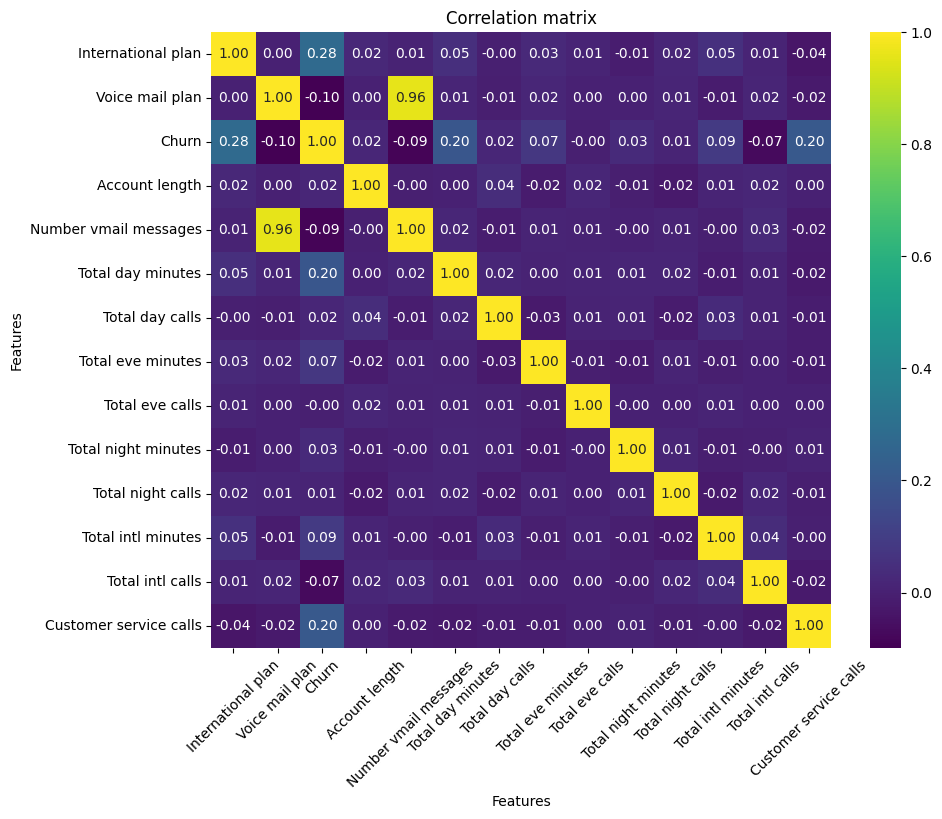

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation
correlation = telcom.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.show()

#**Visualizing data with principal components**

In [75]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    plt.scatter(pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                label=targetlabel, c=color, marker='o')
    plt.xlabel("First principal component (PC1)")
    plt.ylabel("Second principal component (PC2)")
    plt.legend()


In [74]:
from sklearn.decomposition import PCA

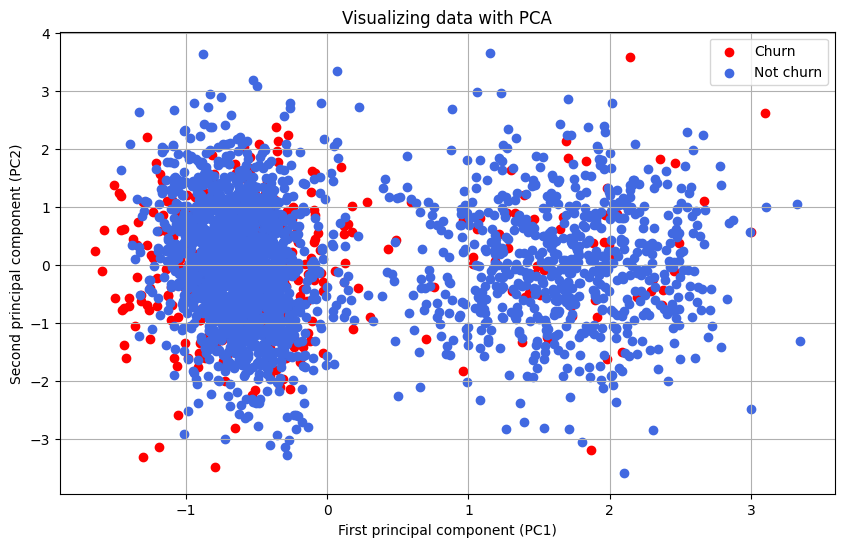

In [73]:

# Assuming 'target_col' is defined elsewhere
pca = PCA(n_components=2)
X = telcom[[i for i in telcom.columns if i not in target_col]]
Y = telcom[target_col]
principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1: "Churn", 0: "Not churn"})

plt.figure(figsize=(10, 6))
pca_scatter(pca_data, 'Churn', 'Churn', 'red')
pca_scatter(pca_data, 'Churn', 'Not churn', 'royalblue')
plt.title("Visualizing data with PCA")
plt.grid(True)
plt.show()


#**Binary variable distribution in customer churn (Radar Chart)**

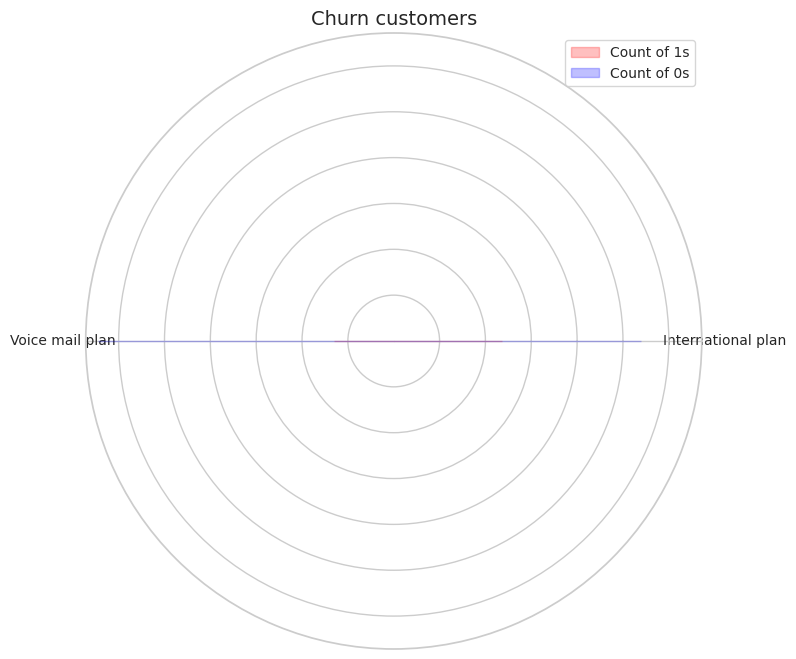

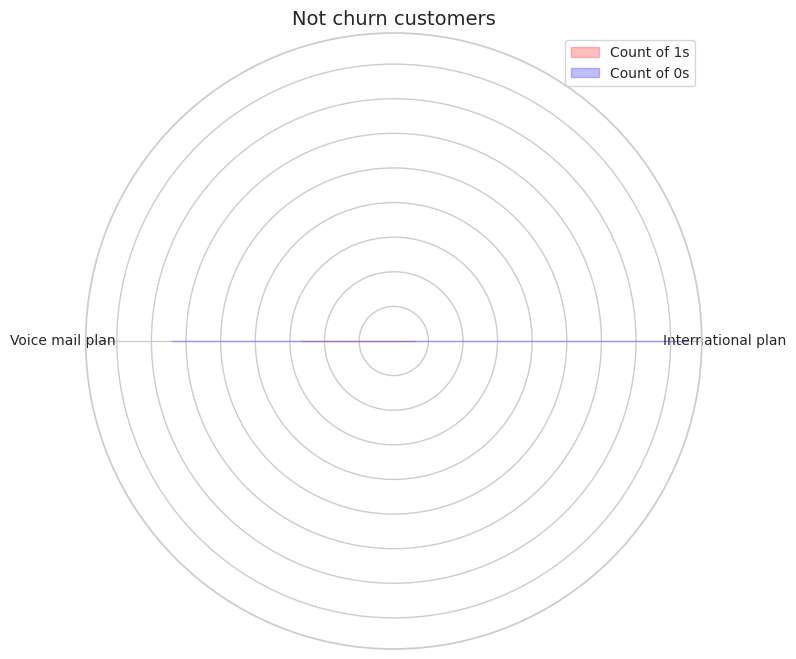

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar(df, aggregate, title):
    data_frame = df[df["Churn"] == aggregate]
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns = ["feature", "yes"]
    data_frame_x["no"] = data_frame.shape[0] - data_frame_x["yes"]
    data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]

    # Polar plot setup
    categories = data_frame_x["feature"].tolist()
    values_yes = data_frame_x["yes"].values.tolist()
    values_no = data_frame_x["no"].values.tolist()

    # Number of variables
    num_vars = len(categories)

    # Compute angle each bar is centered on:
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is circular, so we need to "complete the loop" and append the start point to the end.
    values_yes += values_yes[:1]
    values_no += values_no[:1]
    angles += angles[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values_yes, color='red', alpha=0.25, label='Count of 1s')
    ax.fill(angles, values_no, color='blue', alpha=0.25, label='Count of 0s')
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(title, fontsize=14)
    ax.legend(loc='upper right', fontsize=10)
    plt.show()

# Separating binary columns
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

# Plotting radar chart for churn and not churn customers (binary variables)
plot_radar(dat_rad, 1, "Churn customers")
plot_radar(dat_rad, 0, "Not churn customers")
